In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import wrangle
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pydataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

In [3]:
df = sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df['sex_encoded'] = df.sex.map({'Female': 1, 'Male': 0})

In [7]:
df['sex_encoded'] = df.sex_encoded.astype(int)

In [8]:
df['smoker_encoded'] = df.smoker.map({'Yes': 1, 'No': 0})

In [9]:
df['smoker_encoded'] = df.smoker_encoded.astype(int)

In [10]:
df['time_encoded'] = df.time.map({'Dinner': 1, 'Lunch': 0})

In [11]:
df['time_encoded'] = df.time_encoded.astype(int)

In [12]:
df['day_encoded'] = df.day.map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun':3})

In [13]:
df['day_encoded'] = df.day_encoded.astype(int)

In [14]:
df.drop(columns=['sex', 'smoker', 'time', 'day'], inplace=True)

In [15]:
df.head()

,total_bill,tip,size,sex_encoded,smoker_encoded,time_encoded,day_encoded
0,16.99,1.01,2,1,0,1,3
1,10.34,1.66,3,0,0,1,3
2,21.01,3.50,3,0,0,1,3
3,23.68,3.31,2,0,0,1,3
4,24.59,3.61,4,1,0,1,3


1a. Create a column named price_per_person. This should be the total bill divided by the party size.

In [16]:
df['price_per_person']= df['total_bill']/df['size']

In [17]:
df.head()

,total_bill,tip,size,sex_encoded,smoker_encoded,time_encoded,day_encoded,price_per_person
0,16.99,1.01,2,1,0,1,3,8.495000
1,10.34,1.66,3,0,0,1,3,3.446667
2,21.01,3.50,3,0,0,1,3,7.003333
3,23.68,3.31,2,0,0,1,3,11.840000
4,24.59,3.61,4,1,0,1,3,6.147500


In [18]:
df.corr()

,total_bill,tip,size,sex_encoded,smoker_encoded,time_encoded,day_encoded,price_per_person
total_bill,1.000000,0.675734,0.598315,-0.144877,0.085721,0.183118,0.173693,0.647497
tip,0.675734,1.000000,0.489299,-0.088862,0.005929,0.121629,0.135499,0.347393
size,0.598315,0.489299,1.000000,-0.086195,-0.133178,0.103411,0.165350,-0.175412
sex_encoded,-0.144877,-0.088862,-0.086195,1.000000,-0.002816,-0.205231,-0.230791,-0.108604
smoker_encoded,0.085721,0.005929,-0.133178,-0.002816,1.000000,0.054921,-0.032653,0.229938
time_encoded,0.183118,0.121629,0.103411,-0.205231,0.054921,1.000000,0.874366,0.122431
day_encoded,0.173693,0.135499,0.165350,-0.230791,-0.032653,0.874366,1.000000,0.062499
price_per_person,0.647497,0.347393,-0.175412,-0.108604,0.229938,0.122431,0.062499,1.000000


1b. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

1c. Use select k best to select the top 2 features for predicting tip amount. What are they?

In [19]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames.
    return train, validate, test DataFrames.
    '''
    
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, validate, test


In [20]:
train, validate, test = split_data(df)

In [21]:
df=train

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 18 to 166
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        136 non-null    float64
 1   tip               136 non-null    float64
 2   size              136 non-null    int64  
 3   sex_encoded       136 non-null    int64  
 4   smoker_encoded    136 non-null    int64  
 5   time_encoded      136 non-null    int64  
 6   day_encoded       136 non-null    int64  
 7   price_per_person  136 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 9.6 KB


In [23]:
train_scaled = train.copy()

In [24]:
validate_scaled = validate.copy()

In [25]:
test_scaled = test.copy()

# MinMaxScaler()

In [26]:
# make, fit, use:
columns_to_scale = ['total_bill', 'size', 'sex_encoded', 'smoker_encoded', 'time_encoded', 'day_encoded', 'price_per_person']  
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [27]:
train_scaled.head()

,total_bill,tip,size,sex_encoded,smoker_encoded,time_encoded,day_encoded,price_per_person
18,0.307114,3.50,0.4,1.0,0.0,1.0,1.000000,0.150344
172,0.092355,5.15,0.2,0.0,1.0,1.0,1.000000,0.032258
118,0.206805,1.80,0.2,1.0,0.0,0.0,0.000000,0.182796
28,0.411622,4.30,0.2,0.0,0.0,1.0,0.666667,0.452194
237,0.657534,1.17,0.2,0.0,1.0,1.0,0.666667,0.775647


In [28]:
def visualize_scaler(scaler, df, columns_to_scale):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(30, 20))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col])
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col])
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
#    return fig, axs

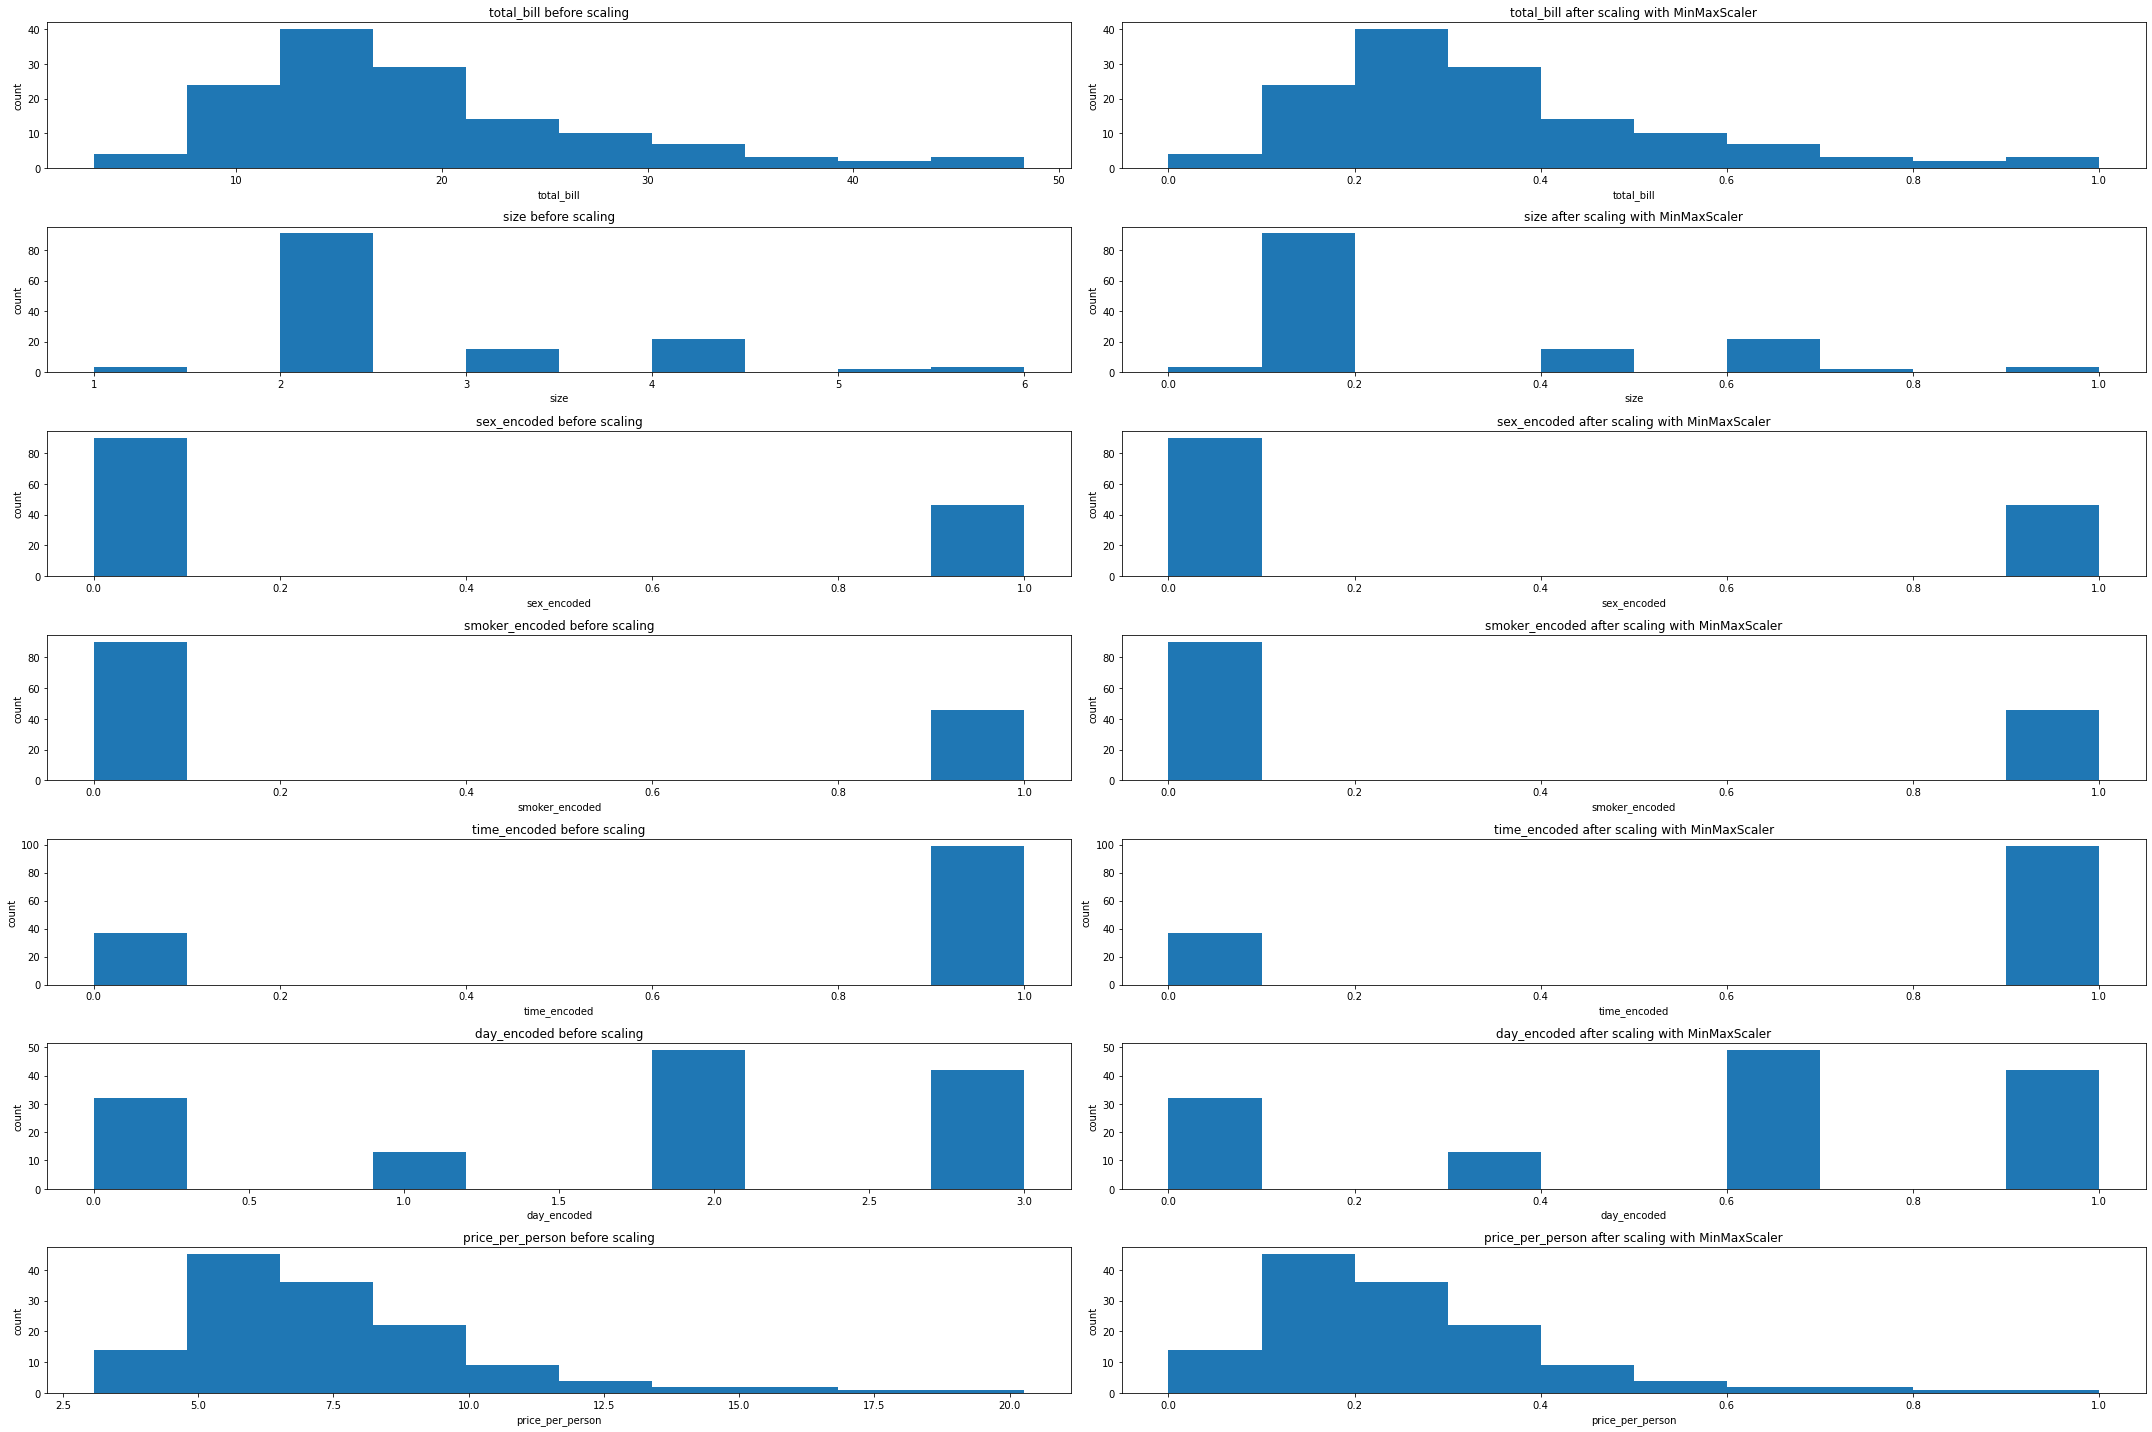

In [29]:
# MinMaxScaler Applied
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale)

# StandardScaler()

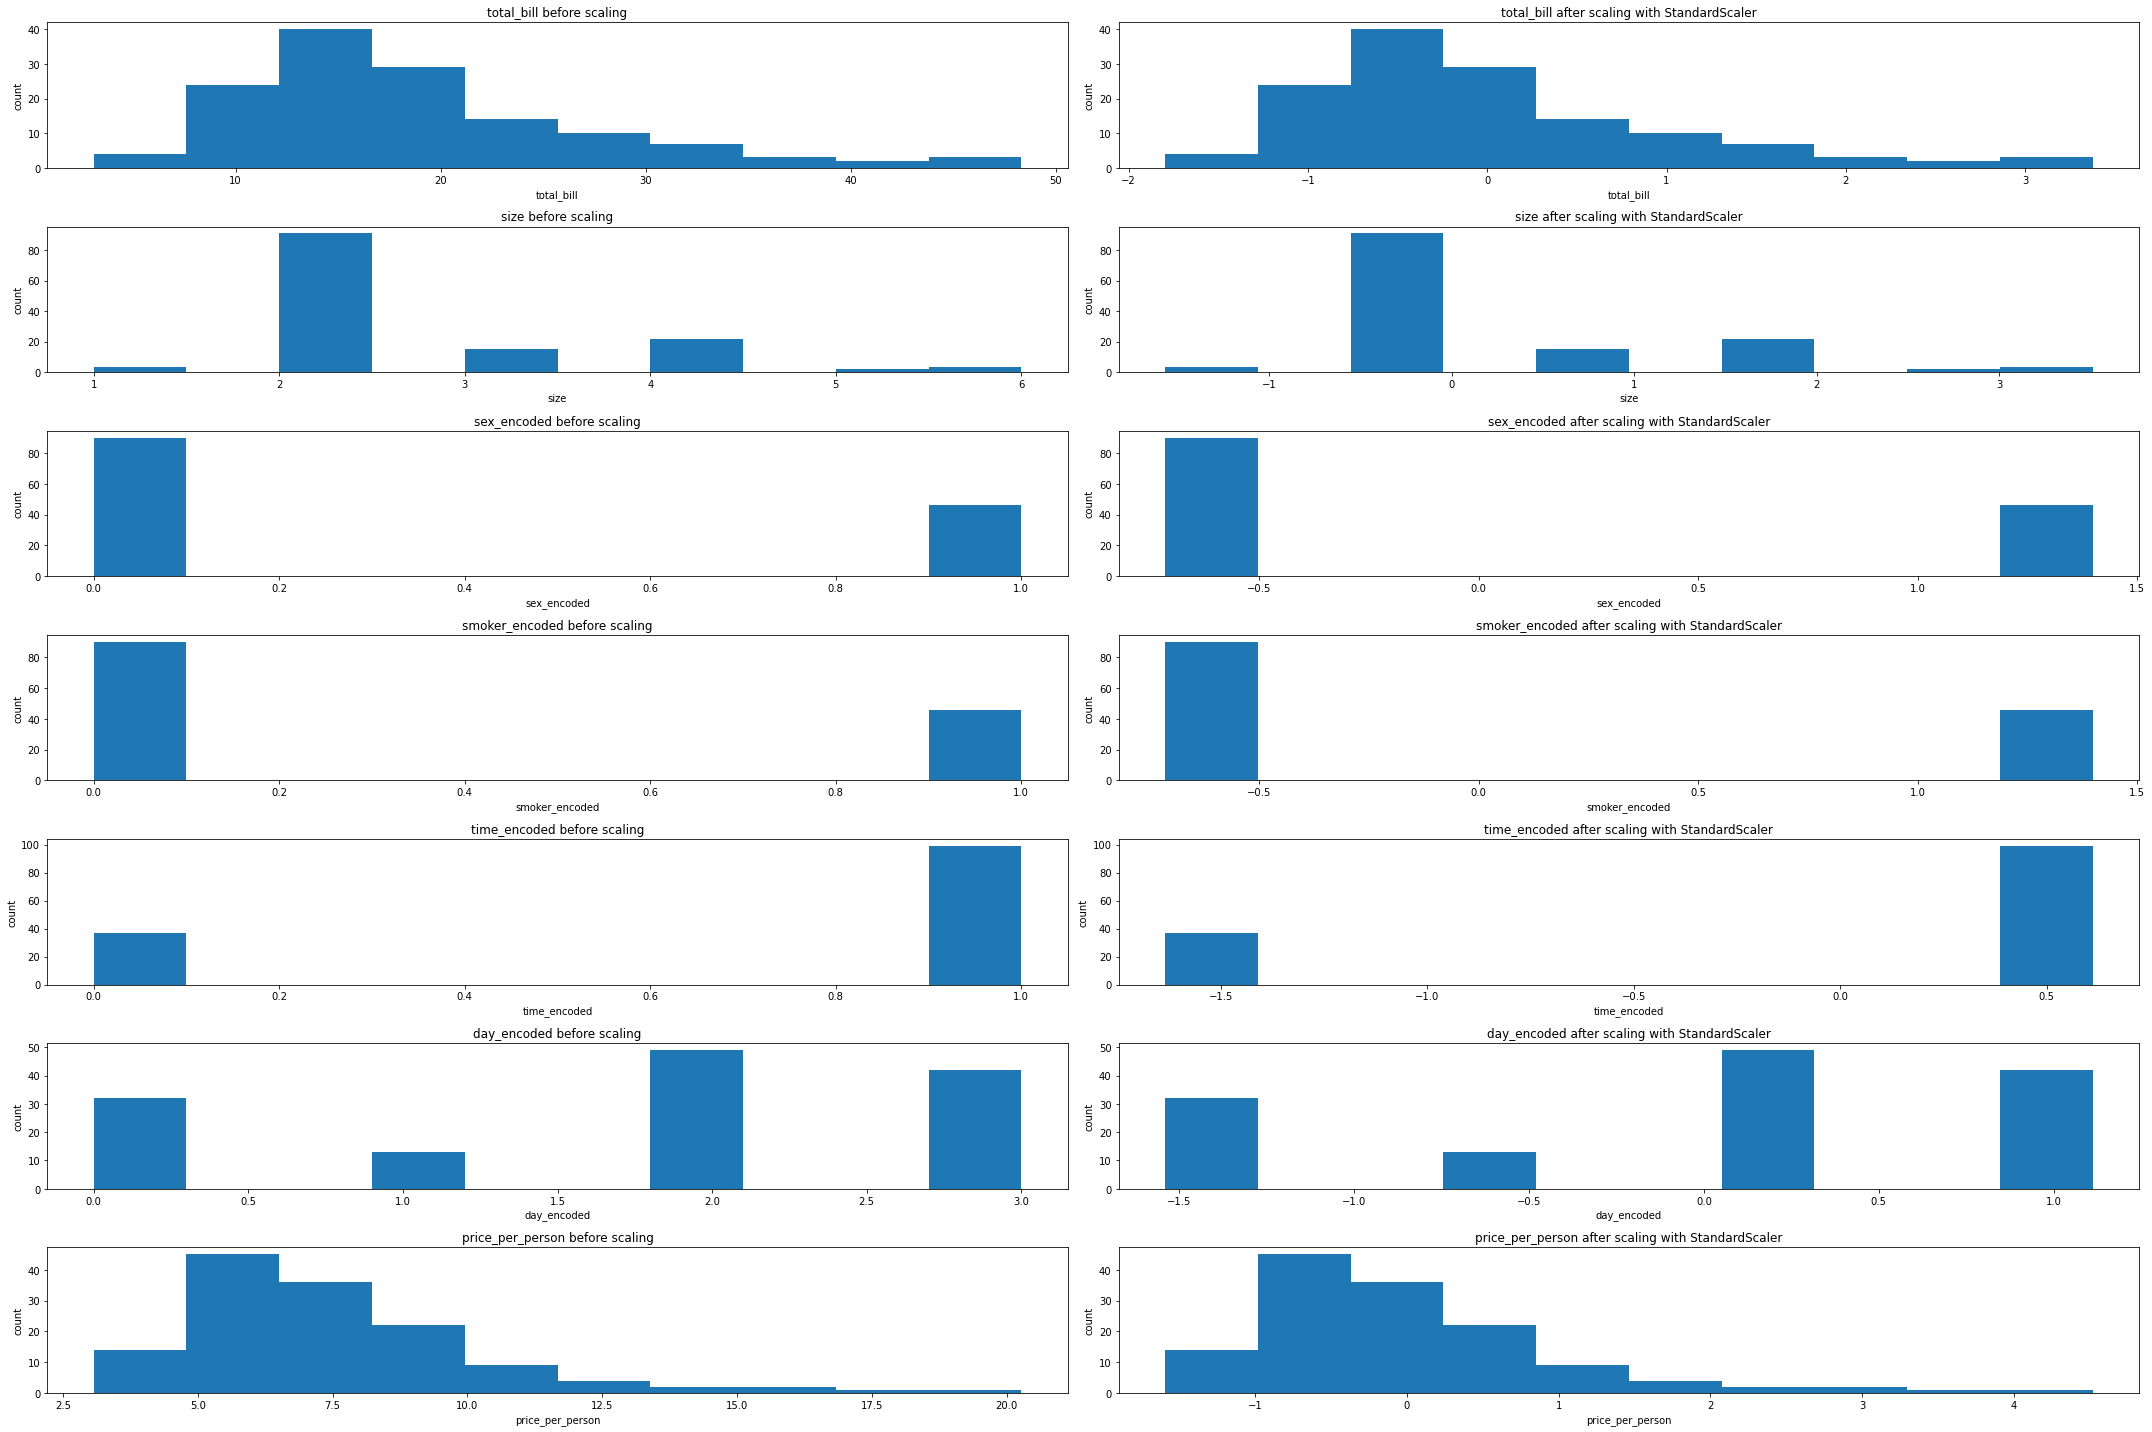

In [30]:
# StandardScaler Applied
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale)

# RobustScaler()

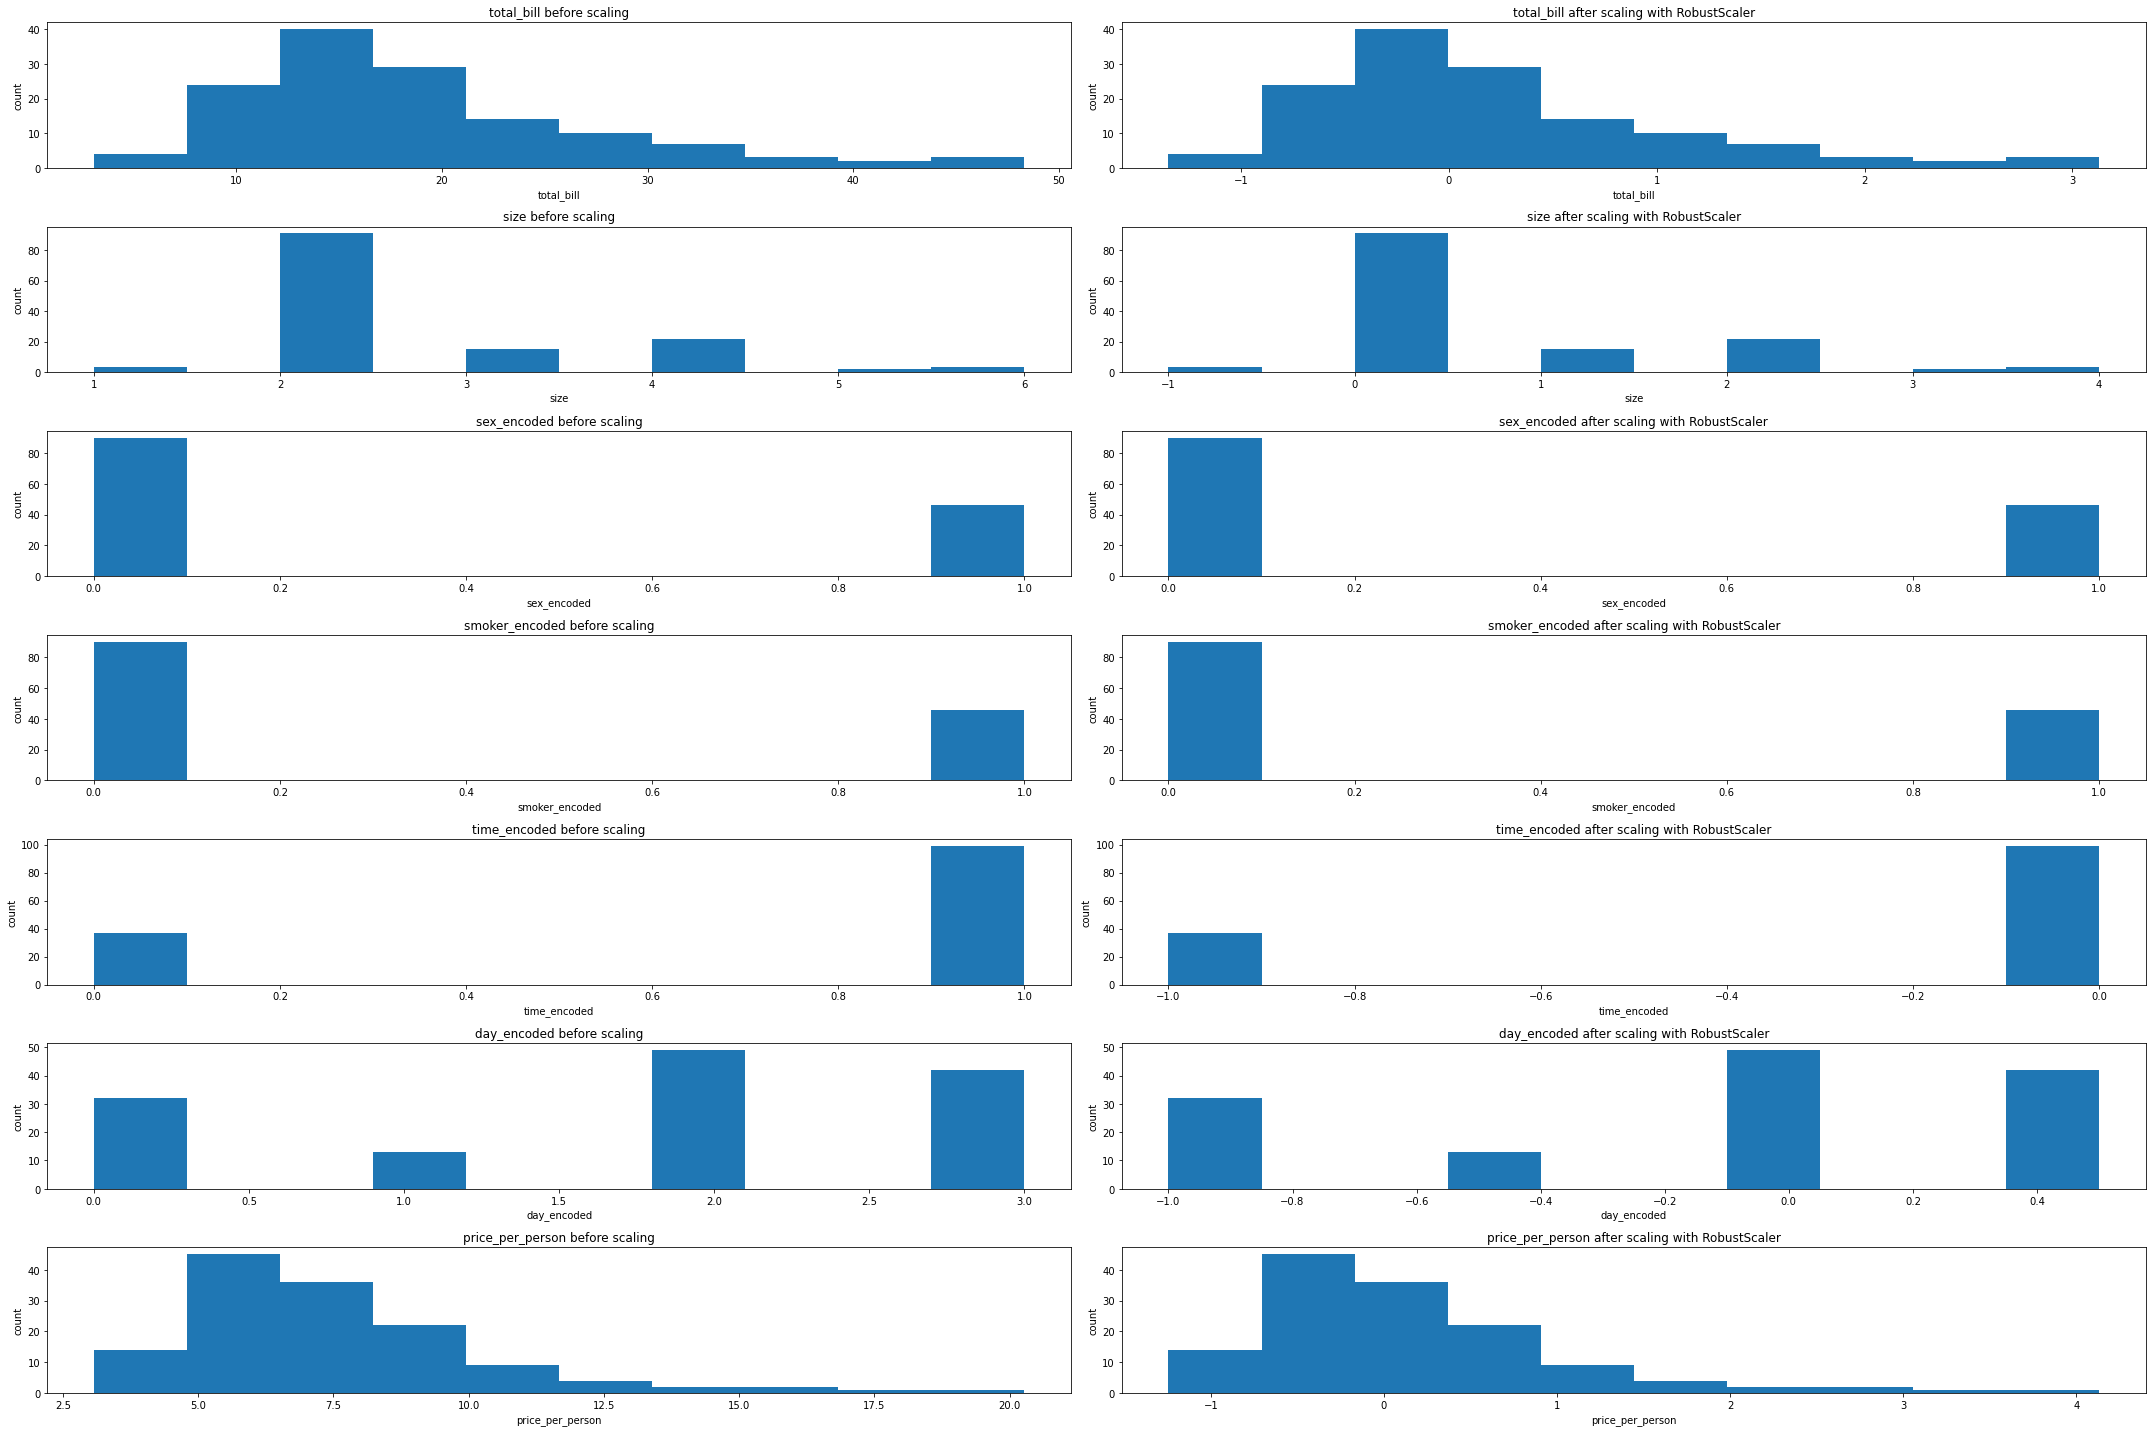

In [31]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale)

In [32]:
X_train=train_scaled.drop(columns=['tip'])
y_train=train_scaled.tip

In [33]:
X_validate=validate_scaled.drop(columns=['tip'])
y_validate=validate_scaled.tip

In [34]:
X_test=test_scaled.drop(columns=['tip'])
y_test=test_scaled.tip

# KBEST

In [35]:
# make the thing
kbest = SelectKBest(f_regression, k=2)
# fit the thing
_ = kbest.fit(X_train, y_train)

In [36]:
# statistical f-value:
kbest.scores_
#p value: 
kbest.pvalues_

array([7.18647033e-20, 1.34164190e-12, 2.84479443e-01, 5.57997755e-01,
       1.82144884e-01, 1.04585545e-01, 1.31032690e-03])

In [37]:
kbest_results = pd.DataFrame(
    dict(p=kbest.pvalues_, f=kbest.scores_),
                             index = X_train.columns)

In [38]:
kbest_results

,p,f
total_bill,7.186470e-20,115.984909
size,1.341642e-12,61.259089
sex_encoded,2.844794e-01,1.154792
smoker_encoded,5.579978e-01,0.344909
time_encoded,1.821449e-01,1.798647
day_encoded,1.045855e-01,2.670276
price_per_person,1.310327e-03,10.777792


In [39]:
# get-support() will output a boolean mask to tell me which features were selected
# we can apply this mask to the columns in our original dataframe
X_train.columns[kbest.get_support()]

Index(['total_bill', 'size'], dtype='object')

In [40]:
# kbest transform will convert our information to the selected feature subspace
# ****buuuuuut, its just a numpy array
kbest.transform(X_train)[:5]

array([[0.30711445, 0.4       ],
       [0.09235528, 0.2       ],
       [0.20680513, 0.2       ],
       [0.41162174, 0.2       ],
       [0.65753425, 0.2       ]])

In [41]:
X_train_transformed = pd.DataFrame(
    kbest.transform(X_train),
    columns=X_train.columns[kbest.get_support()],
    index=X_train.index
)

In [42]:
X_train_transformed.head(3)

,total_bill,size
18,0.307114,0.4
172,0.092355,0.2
118,0.206805,0.2


1d. Use recursive feature elimination to select the top 2 features for tip amount. What are they?

In [43]:
# make a model object to use in RFE process.
# The model is here to give us metrics on feature importance and model score
# allowing us to recursively reduce the number of features to reach our desired space
model = LinearRegression()

In [44]:
# make thing
rfe = RFE(model, n_features_to_select=2)
# fit thing
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [45]:
rfe.ranking_

array([1, 2, 3, 6, 5, 4, 1])

In [46]:
pd.DataFrame(
{
    'rfe_ranking': rfe.ranking_
},index = X_train.columns)

,rfe_ranking
total_bill,1
size,2
sex_encoded,3
smoker_encoded,6
time_encoded,5
day_encoded,4
price_per_person,1


In [47]:
rfe.get_support()

array([ True, False, False, False, False, False,  True])

In [48]:
X_train_transformed = pd.DataFrame(
rfe.transform(X_train),
index = X_train.index,
columns = X_train.columns[rfe.support_])

In [49]:
X_train_transformed.head()

,total_bill,price_per_person
18,0.307114,0.150344
172,0.092355,0.032258
118,0.206805,0.182796
28,0.411622,0.452194
237,0.657534,0.775647


1e. Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?

2. Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [50]:
def select_kbest(X, y, k=2):
    kbest= SelectKBest(f_regression, k=k)
    kbest.fit(X,y)
    mask = kbest.get_support()
    return X.columns[mask]


In [51]:
select_kbest(X_train, y_train, 3)

Index(['total_bill', 'size', 'price_per_person'], dtype='object')

3. Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [52]:
def rfe(X,y,k=2):
    rf= RFE(LinearRegression(), n_features_to_select=k)
    rf.fit(X,y)
    mask = rf.get_support()
    return X.columns[mask]

In [53]:
rfe(X_train, y_train)

Index(['total_bill', 'price_per_person'], dtype='object')

4. Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [54]:
df = pydataset.data('swiss')

In [55]:
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [57]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames.
    return train, validate, test DataFrames.
    '''
    
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, validate, test

In [58]:
train, validate, test = split_data(df)

In [59]:
df=train

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Rolle to Avenches
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         25 non-null     float64
 1   Agriculture       25 non-null     float64
 2   Examination       25 non-null     int64  
 3   Education         25 non-null     int64  
 4   Catholic          25 non-null     float64
 5   Infant.Mortality  25 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.4+ KB


In [61]:
train_scaled = train.copy()

In [62]:
validate_scaled = validate.copy()

In [63]:
test_scaled = test.copy()

In [64]:
train_scaled.columns

Index(['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic',
       'Infant.Mortality'],
      dtype='object')

In [65]:
# make, fit, use:
columns_to_scale = ['Agriculture', 'Examination', 'Education', 'Catholic',
       'Infant.Mortality']  
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [66]:
def visualize_scaler(scaler, df, columns_to_scale):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(30, 20))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col])
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col])
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
#    return fig, axs

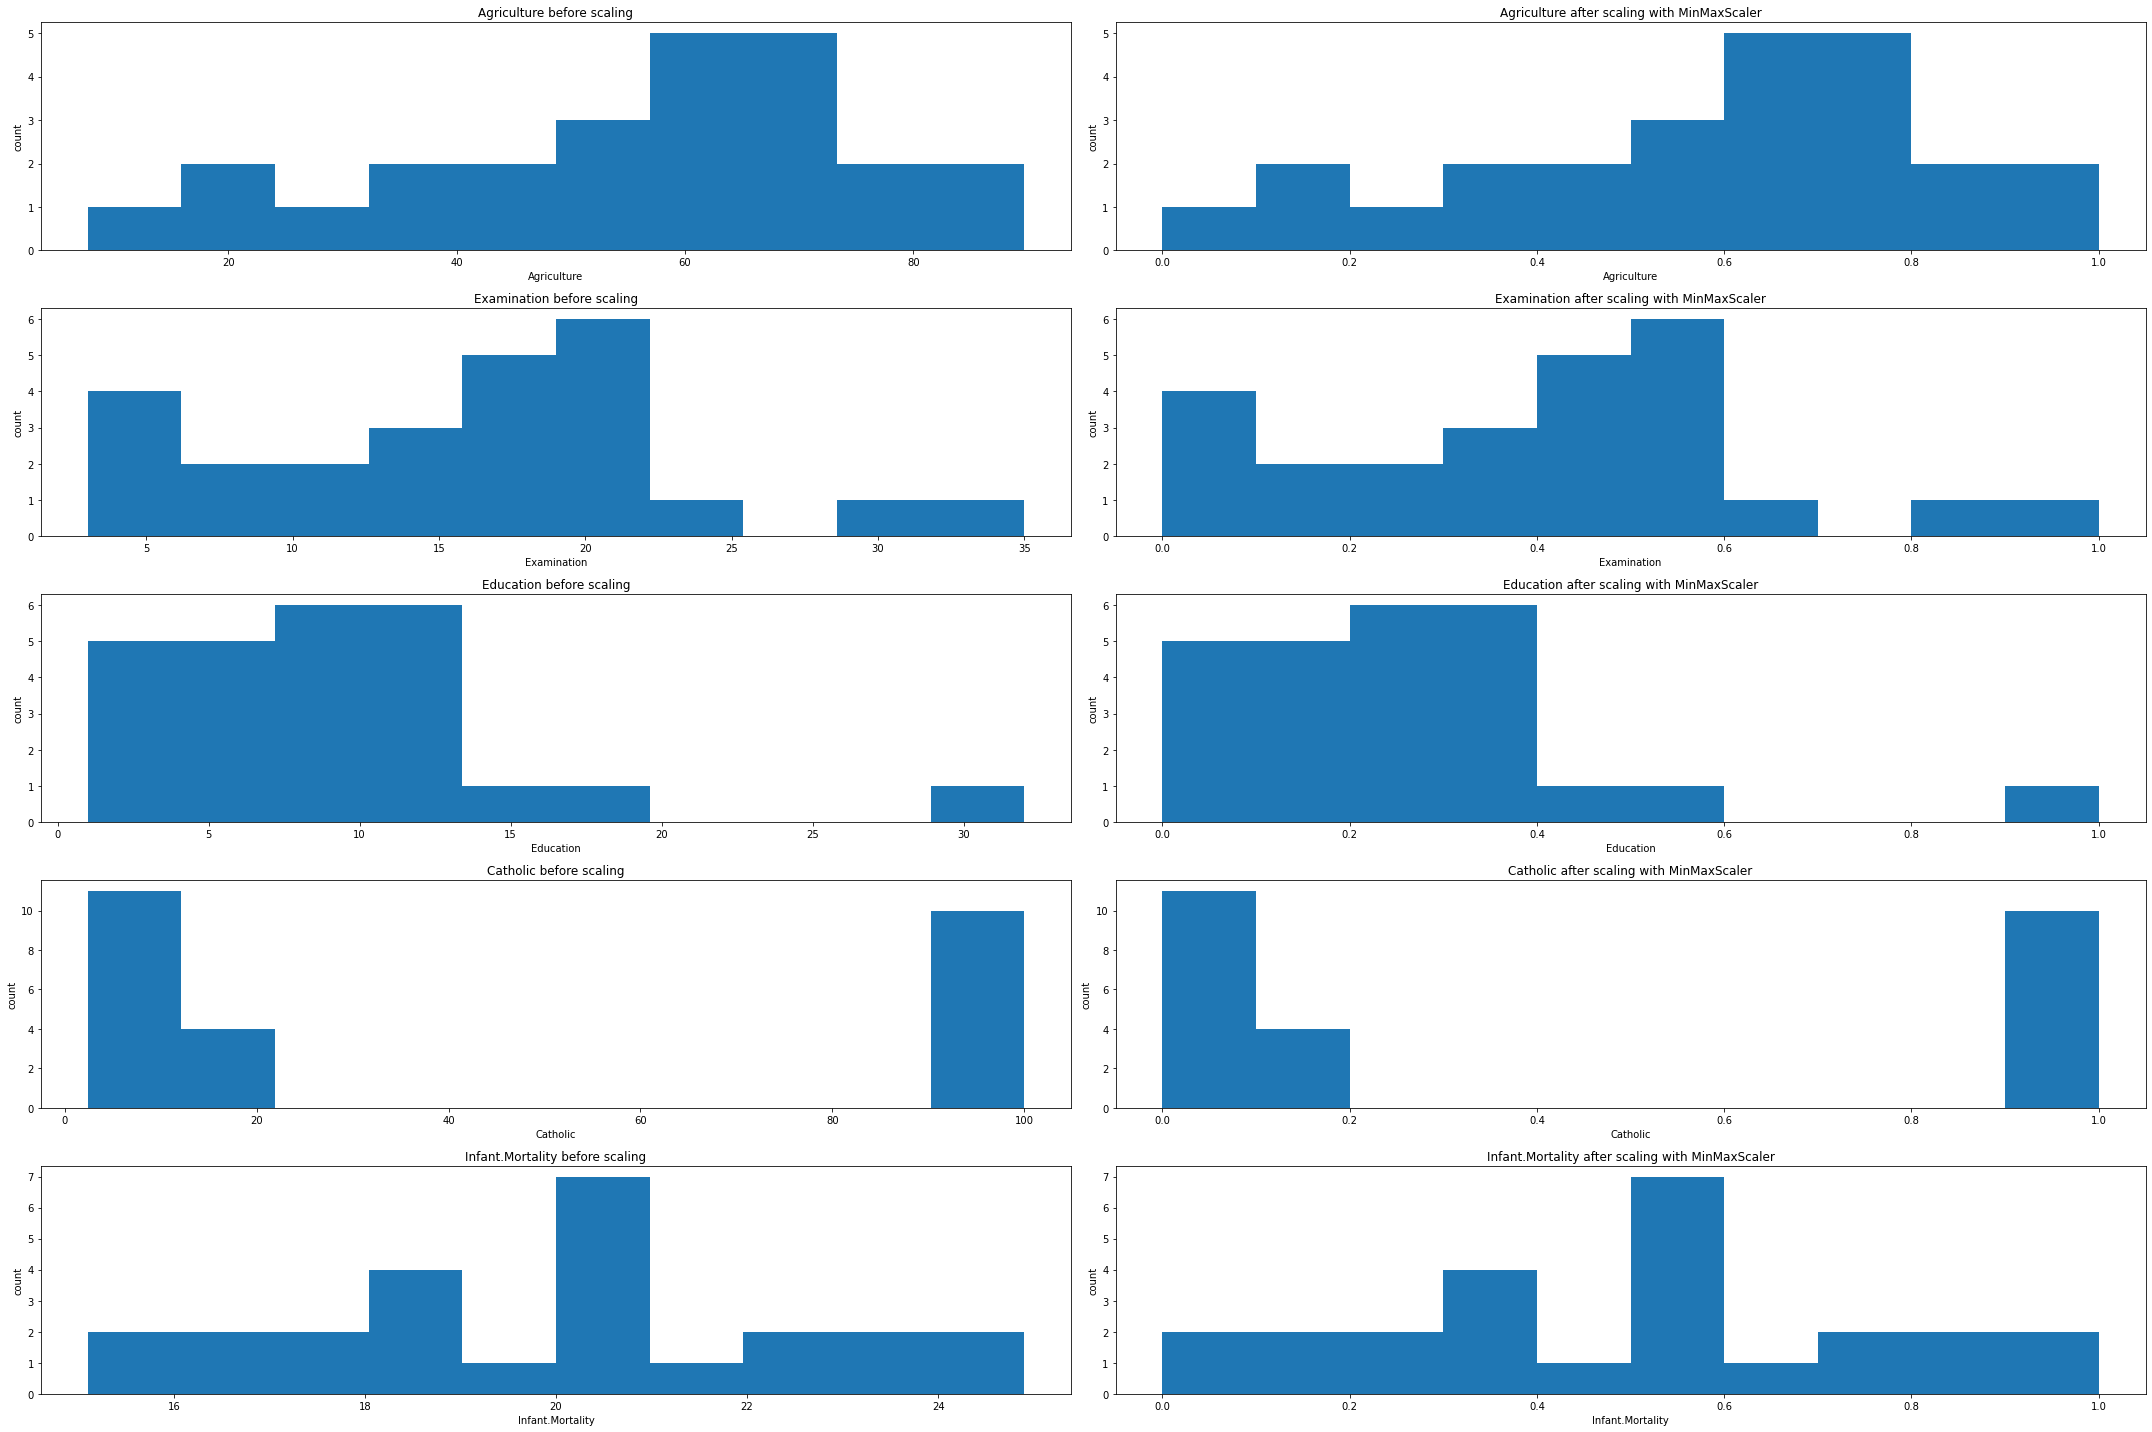

In [67]:
# MinMaxScaler Applied
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale)

In [68]:
X_train=train_scaled.drop(columns=['Fertility'])
y_train=train_scaled.Fertility

In [69]:
X_validate=validate_scaled.drop(columns=['Fertility'])
y_validate=validate_scaled.Fertility

In [70]:
X_test=test_scaled.drop(columns=['Fertility'])
y_test=test_scaled.Fertility

In [71]:
# make the thing
kbest = SelectKBest(f_regression, k=3)
# fit the thing
_ = kbest.fit(X_train, y_train)

In [72]:
# statistical f-value:
kbest.scores_
#p value: 
kbest.pvalues_

array([3.99513724e-01, 6.36932059e-03, 1.91453689e-01, 3.54585463e-04,
       2.46625312e-02])

In [73]:
kbest_results = pd.DataFrame(
    dict(p=kbest.pvalues_, f=kbest.scores_),
                             index = X_train.columns)

In [74]:
kbest_results

,p,f
Agriculture,0.399514,0.736900
Examination,0.006369,9.008418
Education,0.191454,1.811436
Catholic,0.000355,17.518694
Infant.Mortality,0.024663,5.779868


In [75]:
# get-support() will output a boolean mask to tell me which features were selected
# we can apply this mask to the columns in our original dataframe
X_train.columns[kbest.get_support()]

Index(['Examination', 'Catholic', 'Infant.Mortality'], dtype='object')

In [76]:
# kbest transform will convert our information to the selected feature subspace
# ****buuuuuut, its just a numpy array
kbest.transform(X_train)[:5]

array([[0.40625   , 0.0545082 , 0.12244898],
       [0.5       , 0.0045082 , 0.5       ],
       [0.59375   , 0.13053279, 0.16326531],
       [0.        , 0.99702869, 0.        ],
       [0.375     , 0.03790984, 0.75510204]])

In [77]:
X_train_transformed = pd.DataFrame(
    kbest.transform(X_train),
    columns=X_train.columns[kbest.get_support()],
    index=X_train.index
)

In [78]:
X_train_transformed.head(3)

,Examination,Catholic,Infant.Mortality
Rolle,0.40625,0.054508,0.122449
Lavaux,0.50000,0.004508,0.500000
Nyone,0.59375,0.130533,0.163265


In [79]:
# make a model object to use in RFE process.
# The model is here to give us metrics on feature importance and model score
# allowing us to recursively reduce the number of features to reach our desired space
model = LinearRegression()

In [80]:
# make thing
rfe = RFE(model, n_features_to_select=3)
# fit thing
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [81]:
rfe.ranking_

array([1, 1, 3, 2, 1])

In [82]:
pd.DataFrame(
{
    'rfe_ranking': rfe.ranking_
},index = X_train.columns)

,rfe_ranking
Agriculture,1
Examination,1
Education,3
Catholic,2
Infant.Mortality,1


In [83]:
rfe.get_support()

array([ True,  True, False, False,  True])

In [84]:
X_train_transformed = pd.DataFrame(
rfe.transform(X_train),
index = X_train.index,
columns = X_train.columns[rfe.support_])

In [85]:
X_train_transformed.head()

,Agriculture,Examination,Infant.Mortality
Rolle,0.647561,0.40625,0.122449
Lavaux,0.796341,0.50000,0.500000
Nyone,0.526829,0.59375,0.163265
Conthey,0.953659,0.00000,0.000000
Yverdon,0.509756,0.37500,0.755102


In [86]:
X_train.head()

,Agriculture,Examination,Education,Catholic,Infant.Mortality
Rolle,0.647561,0.40625,0.290323,0.054508,0.122449
Lavaux,0.796341,0.50000,0.258065,0.004508,0.500000
Nyone,0.526829,0.59375,0.354839,0.130533,0.163265
Conthey,0.953659,0.00000,0.032258,0.997029,0.000000
Yverdon,0.509756,0.37500,0.225806,0.037910,0.755102
